# Manifold learning on handwritten digits

Code is taken from https://scikit-learn.org/stable/auto_examples/manifold/plot_lle_digits.html

In this script, the dataset is split into training and out-of-sample to see where unseen samples are mapped to. 

In [1]:
#!/usr/bin/env python3
from sklearn import (
    manifold,
    datasets,
    decomposition,
    ensemble,
    discriminant_analysis,
    random_projection,
    neighbors,
)

from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from matplotlib import offsetbox
import numpy as np
import sys

from paths import datafold_path
sys.path.append(datafold_path)

from datafold.dynfold.diffusion_maps import DiffusionMaps
from datafold.dynfold.plot import plot_eigenvectors_n_vs_all

In [8]:
def plot_embedding(X, title=None):
    x_min, x_max = np.min(X, 0), np.max(X, 0)
    X = (X - x_min) / (x_max - x_min)

    plt.figure(figsize=[10, 10])
    ax = plt.subplot(111)
    for i in range(X.shape[0]):
        plt.text(
            X[i, 0],
            X[i, 1],
            str(y[i]),
            color=plt.cm.Set1(y[i] / 10.0),
            fontdict={"weight": "bold", "size": 9},
        )

    if hasattr(offsetbox, "AnnotationBbox"):
        # only print thumbnails with matplotlib > 1.0
        shown_images = np.array([[1.0, 1.0]])  # just something big
        for i in range(X.shape[0]):
            dist = np.sum((X[i] - shown_images) ** 2, 1)
            if np.min(dist) < 4e-3:
                # don't show points that are too close
                continue
            shown_images = np.r_[shown_images, [X[i]]]
            imagebox = offsetbox.AnnotationBbox(
                offsetbox.OffsetImage(digits.images[i], cmap=plt.cm.gray_r), X[i]
            )
            ax.add_artist(imagebox)
    plt.xticks([]), plt.yticks([])
    if title is not None:
        plt.title(title)

In [9]:
digits = datasets.load_digits(n_class=8)
X = digits.data
y = digits.target


X_train, X_test, y_train, y_test = train_test_split(
    X, y, train_size=2 / 3, test_size=1 / 3
)

In [10]:
dmap_embed = DiffusionMaps(epsilon=105, n_eigenpairs=6).fit(X_train)
indices = [1, 2]

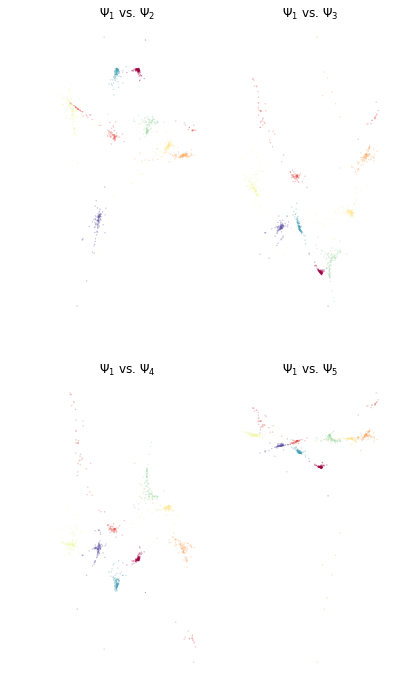

In [11]:
plot_eigenvectors_n_vs_all(eigenvectors=dmap_embed.eigenvectors_.T, n=1, colors=y_train)

In [16]:
dmap_embed_eval_train = dmap_embed.transform(X_train)[:,indices]#, indices=indices)
dmap_embed_eval_test = dmap_embed.transform(X_test)[:,indices]#, indices=indices)

Text(0.5, 1.0, 'test set (out of sample)')

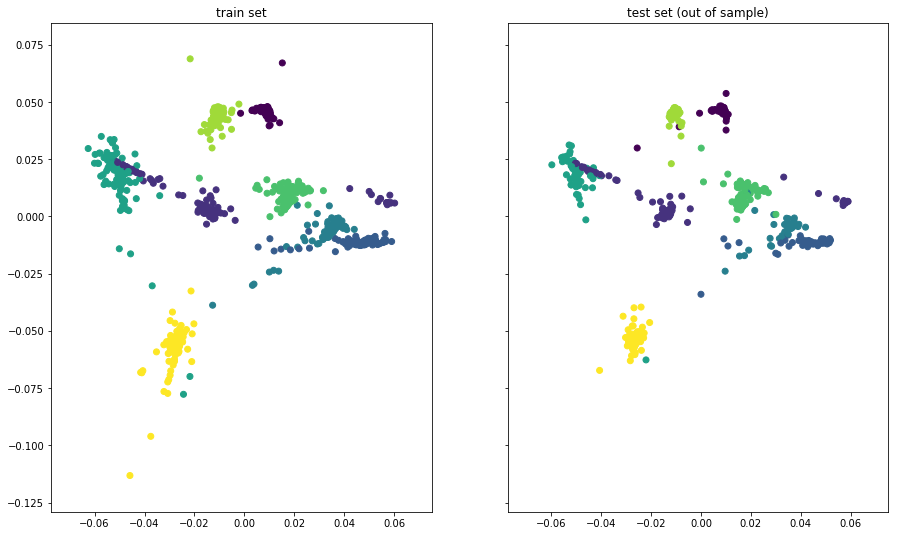

In [17]:
f, ax = plt.subplots(1, 2, sharex=True, sharey=True, figsize=[15,9])

ax[0].scatter(dmap_embed_eval_train[:, 0], dmap_embed_eval_train[:, 1], c=y_train)
ax[0].set_title("train set")
ax[1].scatter(dmap_embed_eval_test[:, 0], dmap_embed_eval_test[:, 1], c=y_test)
ax[1].set_title("test set (out of sample)")

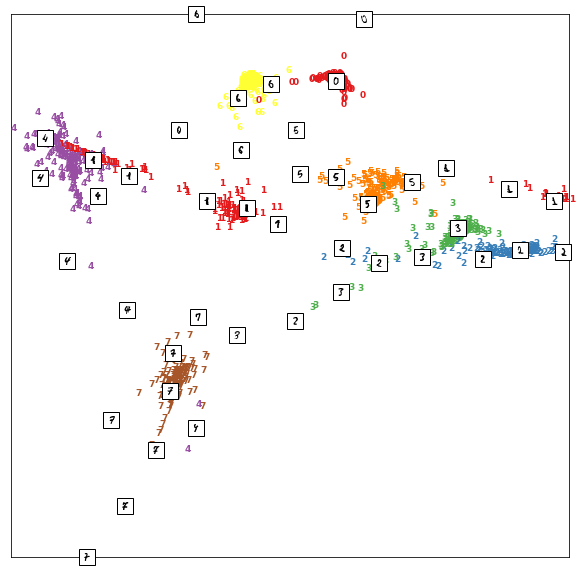

In [19]:
# Mapping of diffusion maps
plot_embedding(dmap_embed.transform(X)[:,indices])